2401
i = 1, temp = UNKNOWN, x = 17, y = 29, % left = 100.0
1617
i = 2, temp = COLDER, x = 49, y = 29, % left = 67.34694
1225
i = 3, temp = WARMER, x = 0, y = 29, % left = 51.02041
637
i = 4, temp = COLDER, x = 25, y = 29, % left = 26.53061
637
i = 5, temp = WARMER, x = 0, y = 29, % left = 26.53061
343
i = 6, temp = COLDER, x = 13, y = 29, % left = 14.28571
343
i = 7, temp = WARMER, x = 0, y = 29, % left = 14.28571
147
i = 8, temp = WARMER, x = 7, y = 29, % left = 6.12245
49
i = 9, temp = WARMER, x = 4, y = 29, % left = 2.04082
0
i = 10, temp = WARMER, x = 5, y = 29, Number left = 0
35
i = 11, temp = COLDER, x = 5, y = 0, % left = 1.45773
11
i = 12, temp = COLDER, x = 5, y = 49, Number left = 11
10
i = 13, temp = WARMER, x = 5, y = 14, Number left = 10
9
i = 14, temp = WARMER, x = 5, y = 25, Number left = 9
4
i = 15, temp = COLDER, x = 5, y = 15, Number left = 4
3
i = 16, temp = WARMER, x = 5, y = 24, Number left = 3
Batman's final coordinates are: 5 20
The bomb's coordinates are: 5 23


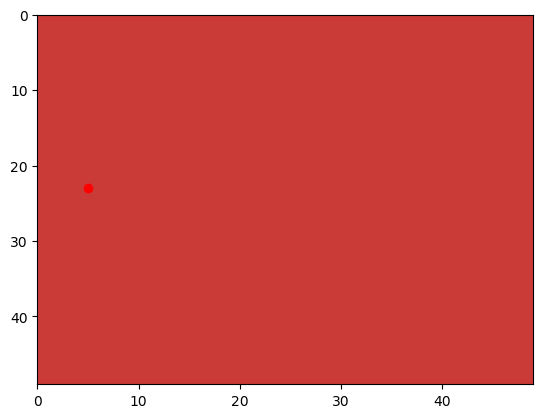

In [24]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

def get_distance(x1,x2,y1,y2):
    x_comp = ( x2 - x1 ) ** 2
    y_comp = ( y2 - y1 ) ** 2
    distance = np.sqrt( x_comp + y_comp )
    return(distance)

def get_temperature(batman):
    if batman.i == 1:
        temperature = "UNKNOWN"
    else:
        r = get_distance(batman.xy["x"]["current"],bomb_x_coordinate,batman.xy["y"]["current"],bomb_y_coordinate)
        if r == 0:
            return("BOILING")
        else:
            if batman.last_distance < r:
                temperature = "COLDER"
            if batman.last_distance > r:
                temperature = "WARMER"
            if batman.last_distance == r:
                temperature = "SAME"
        batman.last_distance = r
    return(temperature)

def get_new_min_max(batman,direction):
    if batman.current_temp == "SAME":
        value = round( ( batman.xy[direction]["current"] + batman.xy[direction]['last']) / 2 )
        batman.set_known(direction,value)
        return(batman)
    change = batman.get_change(direction)
    delta = batman.get_delta(direction)
    range = round( abs( batman.xy[direction]['max'] - batman.xy[direction]['min'] ) )
    current = batman.xy[direction]["current"]
    last = batman.xy[direction]['last']
    
    if batman.current_temp == "COLDER":
        if current > last:
            if change == 1:
                batman.set_known(direction,last)
                return(batman)
            elif change == 2:
                new_max = last
            else:
                new_max = current - delta                 
            batman.set_max(new_max,direction)
        else:
            if change == 1:
                batman.set_known(direction,last)
                return(batman)
            elif change == 2:
                new_min = last
            else:
                new_min = current + delta                 
            batman.set_min(new_min,direction)
    if batman.current_temp == "WARMER":
        if current > last:
            if change <= 2:
                if direction == "y":
                    new_min = current + 1
                else:
                    new_min = current
            else:
                if direction == "y":
                    new_min = last + 1
                else:
                    new_min = last + delta
            batman.set_min(new_min,direction)
        else:
            if change <= 2:
                if direction == "y":
                    new_max = current - 1
                else:
                    new_max = current
            else:
                new_max = last - delta
            batman.set_max(new_max,direction)
    if direction == "y":
        batman.xy[direction]["max"] = batman.closest_to_max(direction)
        batman.xy[direction]["min"] = batman.closest_to_min(direction)
    return(batman)

class Batman():
    def __init__(self,w,h,x0,y0,bx,by,n):
        self.last_distance = get_distance(x0,bx,y0,by)
        self.build_width = w - 1
        self.build_height = h - 1
        self.xy = dict()
        self.xy['x'] = {'known': False, 'current': x0, 'last': x0, 'min': 0, 'max': self.build_width, 'history': list()}  
        self.xy['y'] = {'known': False, 'current': y0, 'last': y0, 'min': 0, 'max': self.build_height, 'history': list()}
        self.max_moves = n
        self.last_temp = "UNKNOWN"
        self.current_temp = "UNKNOWN"
        self.first_y_step = True
        self.i = 1

    def adjust_by_one(self,direction):
        if self.xy[direction]["current"] + 1 >= self.xy[direction]['min'] and self.xy[direction]["current"] + 1 <= self.xy[direction]['max']:
            self.xy[direction]["current"] = self.xy[direction]["current"] + 1
        else:
            self.xy[direction]["current"] = self.xy[direction]["current"] - 1
        
    def closest_to_min(self,direction):
        value = self.xy[direction]["min"]
        while value in self.xy[direction]["history"]:
            value = value + 1
        return(value)

    def closest_to_max(self,direction):
        value = self.xy[direction]["max"]
        while value in self.xy[direction]["history"]:
            value = value - 1
        return(value)

    def get_change(self,direction):
        change = round( abs(batman.xy[direction]["current"] - batman.xy[direction]['last']) )
        return(change)

    def get_delta(self,direction):
        delta = round( abs( batman.xy[direction]['current'] - batman.xy[direction]['last'] ) / 2 ) #+ 1
        if delta < 1: delta = 1
        return(delta)

    def get_dist_to_min(self,direction):
        dist = abs( round( self.xy[direction]["current"] - self.xy[direction]["min"]) )
        return(dist)

    def get_dist_to_max(self,direction):
        dist = abs( round( self.xy[direction]["current"] - self.xy[direction]["max"]) )
        return(dist)
    
    def get_largest_step(self,direction):
        dist_to_min = self.get_dist_to_min(direction)
        dist_to_max = self.get_dist_to_max(direction)
        if dist_to_max > dist_to_min:
            if direction == "y":
                self.xy[direction]["current"] = self.closest_to_max(direction)
            else:
                self.xy[direction]["current"] = self.xy[direction]["max"]
        else:
            if direction == "y":
                self.xy[direction]["current"] = self.closest_to_min(direction)            
            else:
                self.xy[direction]["current"] = self.xy[direction]["min"]

    def get_percent_left(self):
        total = self.build_width * self.build_height
        num_left = 0
        if not self.xy["x"]['known'] and not self.xy["y"]['known']:
            for x in range(self.xy["x"]['min'],self.xy["x"]['max']):
                for y in range(self.xy["y"]['min'],self.xy["y"]['max']):
                    num_left = num_left + 1
        elif self.xy["x"]['known'] and not self.xy["y"]['known']:
            for y in range(self.xy["y"]['min'],self.xy["y"]['max']):
                num_left = num_left + 1
        elif not self.xy["x"]['known'] and self.xy["y"]['known']:
            for x in range(self.xy["x"]['min'],self.xy["x"]['max']):
                num_left = num_left + 1
        else:
            num_left = 1
        percent = round( ( 100 * ( num_left / total ) ), 5)
        return(percent,num_left)
    
    def set_min(self,new_min,direction):
        if new_min >= self.xy[direction]['min'] and new_min <= self.xy[direction]['max']:
            self.xy[direction]["min"] = new_min
        elif new_min < self.xy[direction]['min'] and new_min <= self.xy[direction]['max']:
            return
        else:
            print("Error: The new x_min is greater than x_max")
            exit()

    def set_max(self,new_max,direction):
        if new_max <= self.xy[direction]['max'] and new_max >= self.xy[direction]['min']:
            self.xy[direction]["max"] = new_max
        elif new_max > self.xy[direction]['max'] and new_max >= self.xy[direction]['min']:
            return
        else:
            print("Error: The new x_max is smaller than x_min")
            exit()

    def set_known(self,direction,a):
        self.xy[direction]["current"] = a
        self.xy[direction]['min'] = a
        self.xy[direction]['max'] = a
        self.xy[direction]['known'] = True

        if direction == "x":
            self.y_first_step()
        
    def verify_change(self,direction):
        if self.xy[direction]['max'] == self.xy[direction]['min']:
            self.set_known(direction,self.xy[direction]['min'])
            return       
        if self.xy[direction]['last'] == self.xy[direction]["current"]:
            print("Error: the guess value wasn't updated.")
            exit()
        else:
            batman.xy[direction]["last_del"] =  abs( self.xy[direction]["current"] - self.xy[direction]['last'] )
            self.xy[direction]['last'] == self.xy[direction]["current"]
            self.xy[direction]['history'].append(self.xy[direction]['current'])

    def y_first_step(self):
        if self.first_y_step:
            direction = "y"
            self.xy[direction]['last'] = self.xy[direction]["current"]
            self.get_largest_step(direction)
            if self.xy[direction]["current"] == self.xy[direction]['last']:
                self.adjust_by_one(batman,direction)
            self.xy[direction]["last_del"] = abs( self.xy[direction]["current"] - self.xy[direction]['last'] )
            self.first_y_step = False
            self.verify_change(direction)
            
    def move(self):
        if self.current_temp == "UNKNOWN":
            direction = "x"
            # Search in x-direction first
            self.xy[direction]['last'] = self.xy[direction]["current"]
            if self.xy[direction]['min'] == self.xy[direction]['max']:
                self.set_known(direction,self.xy[direction]['min'])
            else:
                self.get_largest_step(direction)
        else:
            if not self.xy["x"]['known']:
                self.change_position("x")
            elif not self.xy["y"]['known']:
                direction = "y"
                if self.first_y_step:
                    if self.xy[direction]['min'] == self.xy[direction]['max']:
                        self.set_known(direction,self.xy[direction]['min'])
                    else:
                        self.y_first_step()
                else:
                    self.change_position("y")
                
        self.last_temp = self.current_temp
    
    def change_position(self,direction):
        range = round( (self.xy[direction]['max'] - self.xy[direction]['min']) )
        if range == 0:
            self.set_known(direction,self.xy[direction]['min'])
        else:
            self.xy[direction]['last'] = self.xy[direction]["current"]
            self.get_largest_step(direction)
        self.verify_change(direction)
        
# w: width of the building.
# h: height of the building.
w, h = 50, 50
n = 16  # maximum number of turns before game over.
x0, y0 = 17, 29
bomb_x_coordinate, bomb_y_coordinate = 5, 23
batman = Batman(w,h,x0,y0,bomb_x_coordinate, bomb_y_coordinate,n)
# game loop

#define Matplotlib figure and axis
fig, ax = plt.subplots()
cmap = plt.get_cmap("coolwarm")
slicedCM = cmap(np.linspace(0, 1, n+1))
ax.plot(bomb_x_coordinate,bomb_y_coordinate,'ro')
while True and batman.i <= n and not batman.xy["y"]["known"]:
    batman.current_temp = get_temperature(batman)  # Current distance to the bomb compared to previous distance (COLDER, WARMER, SAME or UNKNOWN)
    if batman.current_temp == "BOILING":
        print("Batman found the bomb!")
        break
    if not batman.xy["x"]["known"]:
        batman = get_new_min_max(batman,"x")
    else:
        batman = get_new_min_max(batman,"y")
    percent_left,num_left = batman.get_percent_left()
    print(num_left)
    if percent_left > 1.0:
        print("i = "+str(batman.i)+", temp = "+str(batman.current_temp)+", x = "+str(batman.xy["x"]["current"])+", y = "+str(batman.xy["y"]["current"])+", % left = "+str(percent_left))
    else:
        print("i = "+str(batman.i)+", temp = "+str(batman.current_temp)+", x = "+str(batman.xy["x"]["current"])+", y = "+str(batman.xy["y"]["current"])+", Number left = "+str(num_left))        
    batman.move()
    if batman.i > 1:
        ax.add_patch(Circle((batman.xy["x"]["current"],batman.xy["y"]["current"]),radius=batman.i*5,color=slicedCM[batman.i-1],fill=True,lw=1))
    batman.i = batman.i + 1

print("Batman's final coordinates are: "+str(batman.xy["x"]["current"])+" "+str(batman.xy["y"]["current"]))
print("The bomb's coordinates are: "+str(bomb_x_coordinate)+" "+str(bomb_y_coordinate))
    # the location of the next window Batman should jump to.
plt.xlim(0,batman.build_height)
plt.ylim(0,batman.build_width)
plt.gca().invert_yaxis()
plt.show()